# 1.lenses data

In [1]:
with open('data/lenses.txt') as f:
    data = f.readlines()

In [19]:
lense1 = [[int(elem) for elem in line.replace('\n', '').split(' ') if elem != ''] for line in data]
print(lense1)
lenses = [example[1:] for example in lense1]
print(lenses)

[[1, 1, 1, 1, 1, 3], [2, 1, 1, 1, 2, 2], [3, 1, 1, 2, 1, 3], [4, 1, 1, 2, 2, 1], [5, 1, 2, 1, 1, 3], [6, 1, 2, 1, 2, 2], [7, 1, 2, 2, 1, 3], [8, 1, 2, 2, 2, 1], [9, 2, 1, 1, 1, 3], [10, 2, 1, 1, 2, 2], [11, 2, 1, 2, 1, 3], [12, 2, 1, 2, 2, 1], [13, 2, 2, 1, 1, 3], [14, 2, 2, 1, 2, 2], [15, 2, 2, 2, 1, 3], [16, 2, 2, 2, 2, 3], [17, 3, 1, 1, 1, 3], [18, 3, 1, 1, 2, 3], [19, 3, 1, 2, 1, 3], [20, 3, 1, 2, 2, 1], [21, 3, 2, 1, 1, 3], [22, 3, 2, 1, 2, 2], [23, 3, 2, 2, 1, 3], [24, 3, 2, 2, 2, 3]]
[[1, 1, 1, 1, 3], [1, 1, 1, 2, 2], [1, 1, 2, 1, 3], [1, 1, 2, 2, 1], [1, 2, 1, 1, 3], [1, 2, 1, 2, 2], [1, 2, 2, 1, 3], [1, 2, 2, 2, 1], [2, 1, 1, 1, 3], [2, 1, 1, 2, 2], [2, 1, 2, 1, 3], [2, 1, 2, 2, 1], [2, 2, 1, 1, 3], [2, 2, 1, 2, 2], [2, 2, 2, 1, 3], [2, 2, 2, 2, 3], [3, 1, 1, 1, 3], [3, 1, 1, 2, 3], [3, 1, 2, 1, 3], [3, 1, 2, 2, 1], [3, 2, 1, 1, 3], [3, 2, 1, 2, 2], [3, 2, 2, 1, 3], [3, 2, 2, 2, 3]]


In [3]:
lenseLabels = ['age', 'prescript', 'astigmatic', 'tearRate']

In [20]:
lenseTree = createTree(lenses, lenseLabels)
lenseTree

{'age': {1: {'prescript': {1: {'astigmatic': {1: {'tearRate': {1: 3, 2: 2}},
      2: {'tearRate': {1: 3, 2: 1}}}},
    2: {'astigmatic': {1: {'tearRate': {1: 3, 2: 2}},
      2: {'tearRate': {1: 3, 2: 1}}}}}},
  2: {'prescript': {1: {'astigmatic': {1: {'tearRate': {1: 3, 2: 2}},
      2: {'tearRate': {1: 3, 2: 1}}}},
    2: {'astigmatic': {1: {'tearRate': {1: 3, 2: 2}}, 2: 3}}}},
  3: {'prescript': {1: {'astigmatic': {1: 3, 2: {'tearRate': {1: 3, 2: 1}}}},
    2: {'astigmatic': {1: {'tearRate': {1: 3, 2: 2}}, 2: 3}}}}}}

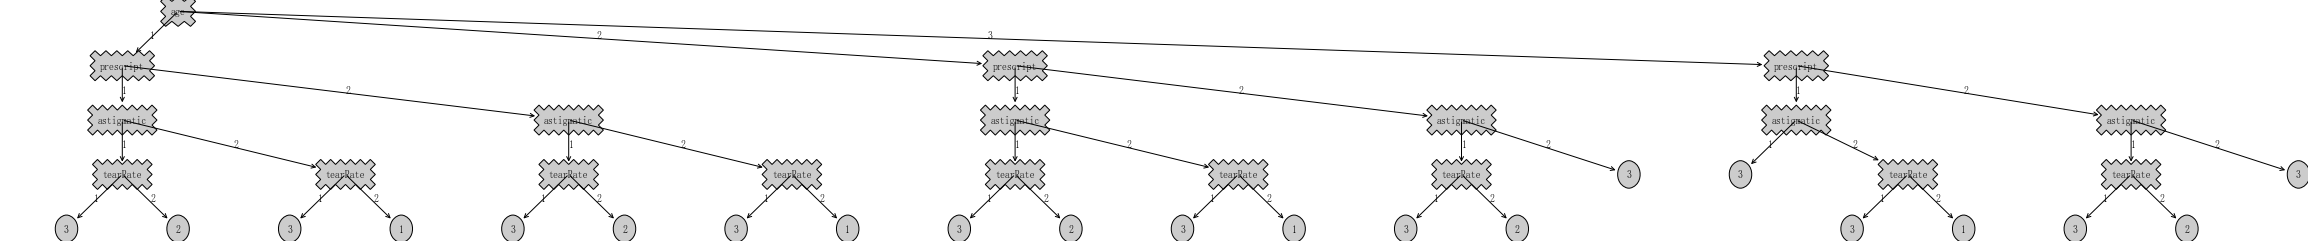

In [32]:
createPlot(lenseTree)

In [28]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
myTree

{'flippers': {0: 'no', 1: {'no surfing ': {0: 'no', 1: 'yes'}}}}

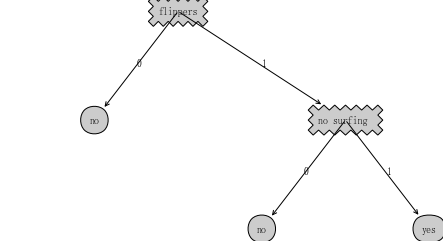

In [31]:
createPlot(myTree)

# 2.Decision_Tree

In [4]:
from math import log
import operator
#import treePlotter
#创建数据集

def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfing ', 'flippers']
    #change to discrete values
    return dataSet, labels

## 2.1calcShannonEnt

In [ ]:
1.为所有可能分类创建字典
2.以2为底求对数

In [5]:
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    ShannonEnt = 0.0
    for key in labelCounts.keys(): #x
        prob = float(labelCounts[key])/numEntries
        ShannonEnt -= prob*log(prob, 2)
    return ShannonEnt       

## 2.2 splitDataSet

In [ ]:
1.创建新的list对象
2.抽取

In [6]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)#x
    return retDataSet

## 2.3 chooseBestFeatureToSplit

In [ ]:
1.创建唯一的分类标签列表
2.计算每种划分方式的信息熵
3.计算最好的信息增益

In [7]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    #classList = [example[-1] for example in dataSet]
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob  = len(subDataSet)/float(len(dataSet))
            newEntropy -= prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain ):
            bestInfoGain = infoGain
            bestFeature = i 
    return bestFeature   

## 2.4 majorityCnt

In [8]:
import operator
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

## 2.5createTree 

In [ ]:
1.类别完全相同则停止继续划分
2.遍历完所有特征时返回出现次数最多的
3.得到列表包含属性值

In [9]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])   
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

## 2.6 使用文本注解绘制树结点 

In [10]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [11]:
decisionNode = dict(boxstyle = "sawtooth", fc = '0.8', pad = 1)
# boxstyle为文本框的类型，sawtooth是锯齿形，fc是边框线粗细  ,pad指的是外边框锯齿形（圆形等）的大小

leafNode = dict(boxstyle = "round4", fc = '0.8', pad = 1)
# 定义决策树的叶子结点的描述属性 round4表示圆形

arrow_args = dict(arrowstyle='<-')
#定义箭头属性

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = 'axes fraction',
                           xytext = centerPt, textcoords = 'axes fraction',
                           va = "center", ha = 'center', bbox = nodeType, arrowprops = arrow_args)
    
    #annotate是关于一个数据点的文本 
    #nodeTxt为要显示的文本，centerPt为文本的中心点，箭头所在的点，parentPt为指向文本的点  
    #annotate的作用是添加注释，nodetxt是注释的内容，
    #nodetype指的是输入的节点（边框）的形状
def createPlot():
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode(U'决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode(U'叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

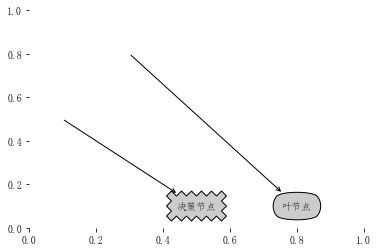

In [12]:
createPlot()

## 2.7 获取叶结点的数目和树的层数

getNumLeafs()  getTreeDepth()在结构和方法上都比较类似
因为tree字典中的每一个大括号的第一个字符都是它对应的键值，所以只需要判断第二个还是不是键值，如果是的话说明还有树或者深度，
用的是递归的思想，在每次循环中先找到该字典中的第一个字符，然后判断该键值下的第二个字符是不是还是键，是的话说明还有深度或者层数，不是的话说明已经找完了。
其中遇到了这样的问题：
1.一开始写这句的时候if type(seconddict[key]).__name__=='dict':书上的是.-name-（单个下划线），但是实际上是双下划线，再者当不加.__name__得时候type函数获得的是字典得类型，而不是本身就是字典，所以要加上name表示这个名字叫做“dict”。
2.在2.x的版本中是firststr=mytree.keys()[],但是dict_keys型的数据不支持索引，所以强制转换成list即可，即 firststr=list(mytree.keys())[0]。


In [13]:
#获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs = 0 
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dcit':
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):##计算判断节点的个数  
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1+ getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth   
    return maxDepth

In [14]:
def retrieveTree(i):
    listOfTrees = [{'no surfcaing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                   
                  {'no surfcaing': {0: 'no', 1: {'flippers': {0: {'head': {0:'no', 1: 'yes'}}, 1:'no'}}}}
                  ]
    return listOfTrees[i]

## 2.8 plotTree函数

In [30]:
def plotMidText(cntrPt, parentPt, txtString):#作用是计算tree的中间位置    
                                            #cntrpt起始位置,parentpt终止位置,txtstring：文本标签信息
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]#cntrPt 起点坐标 子节点坐标   parentPt 结束坐标 父节点坐标
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]#找到x和y的中间位置
    createPlot.ax1.text(xMid, yMid, txtString)
    #使用函数 plotMidText 计算父节点和子节点的中间位置，并在此添加简单的文本标签信息

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)#计算子节点的坐标 
    plotMidText(cntrPt, parentPt, nodeTxt)#绘制线上的文字  
    plotNode(firstStr, cntrPt, parentPt, decisionNode)#绘制节点  
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD#每绘制一次图，将y的坐标减少1.0/plottree.totald，间接保证y坐标上深度的
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt, str(key) )
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    
    
def createPlot(inTree):
    # 类似于Matlab的figure，定义一个画布(暂且这么称呼吧)，背景为白色
    fig = plt.figure(1, facecolor='white')
    fig.clf() # 把画布清空 
    axprops = dict(xticks=[], yticks=[])
    # createPlot.ax1为全局变量，绘制图像的句柄，subplot为定义了一个绘图，111表示figure中的图有1行1列，即1个，最后的1代表第一个图 
    # frameon表示是否绘制坐标轴矩形
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops) 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

## 2.9 测试和存储

In [16]:
#使用决策树的分类函数 
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ =='dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else: classLabel = secondDict[key]
    return classLabel

存储与读取决策树主要是用到了pickle模块，具体我也没有细细的去深究pickle模块，具体可以参考http://www.php.cn/python-tutorials-372984.html。

运行过程中报错如下：

fr=open(filename)
return pickle.load(fr)
但是报错UnicodeDecodeError: 'gbk' codec can't decode byte 0x80 in position 0: illegal multibyte sequence
这是因为早期的pickle代码是二进制的pickle（除了最早的版本外）是二进制格式的，所以你应该带 'rb' 标志打开文件。
改成
def grabtree(filename):
import pickle
fr=open(filename,'rb')
return pickle.load(fr)即可

In [17]:
"""
错误原因：pickle模块存储的是二进制字节码，需要以二进制的方式进行读写
1. 报错一：TypeError: write() argument must be str, not bytes
2. 报错二：UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

http://www.cnblogs.com/huiAlex/p/8855810.html
"""

#生成决策树的存储
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)


In [38]:
"""
可以预先提炼并存储数据集中包含的知识信息，在需要对事物进行分类时再使用这些知识
"""
storeTree(mytree, 'classifierstorage.txt')
print(grabTree('classifierstorage.txt'))

{'no surfing ': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
